In [1]:
import topojson
from shapely import geometry
from shapely.ops import shared_paths
from shapely.ops import linemerge

In [19]:
# equal lines
# data = {
#     "abc1": {"type": "LineString", "coordinates": [[0, 0], [1.0, 0], [2.0, 0]]},
#     "abc2": {"type": "LineString", "coordinates": [[0, 0], [1.0, 0], [2.0, 0]]}
# } 

# # forward backward lines
# data = {
#     "abc3": {"type": "LineString", "coordinates": [(0, 0), (10, 0), (10, 5), (20, 5)]},
#     "abc4": {"type": "LineString", "coordinates": [(5, 0), (30, 0), (30, 5), (0, 5)]}
# } 

# # more than two lines
# data = {
#     "abc1": {"type": "LineString", "coordinates": [(0, 0), (15, 2.5), (30, 5)]},
#     "abc2": {"type": "LineString", "coordinates": [(0, 0), (15, 2.5), (30, 5)]},
#     "abc3": {"type": "LineString", "coordinates": [(0, 0), (10, 0), (10, 5), (20, 5)]},
#     "abc4": {"type": "LineString", "coordinates": [(5, 0), (30, 0), (30, 5), (0, 5)]}
# }

# # identical polygon
# data = {
#     "abca1": {"type": "Polygon", "coordinates": [[[0, 0], [1, 1], [2, 0], [0, 0]]]},
#     "abca2": {"type": "Polygon", "coordinates": [[[0, 0], [1, 1], [2, 0], [0, 0]]]}
# }

# reversed identical polygon
data = {
    "abca": {"type": "Polygon", "coordinates": [[[0, 0], [1, 1], [2, 0], [0, 0]]]},
    "acba": {"type": "Polygon", "coordinates": [[[0, 0], [2, 0], [1, 1], [0, 0]]]}
}

# invalid polygon geometry
data = {
    "wrong": {"type": "Polygon", "coordinates": [[[0, 0], [1, 0], [2, 0], [0, 0]]]},
    "valid": {"type": "Polygon", "coordinates": [[[0, 0], [2, 0], [1, 1], [0, 0]]]}
}

# multipolygon with hole
data = {
    "foo": {
        "type": "MultiPolygon",
        "coordinates": [
            [
                [[0, 0], [20, 0], [10, 20], [0, 0]], # CCW
                [[3, 2], [10, 16], [17, 2], [3, 2]] # CW
            ],  
            [
                [[6, 4], [14, 4], [10, 12], [6, 4]] #CCW 
            ],
            [
                [[25, 5], [30, 10], [35, 5], [25, 5]]
            ]
        ]
    }
}

data = {
    "foo": {
        "type": "MultiLineString",
        "coordinates": [
        [[0.0, 0.0], [1, 1], [3, 3]],
        [[1, 1], [0, 1]],
        [[3,3], [4, 4], [0, 1]]
        ]
    }
} 

In [20]:
join = topojson.join(topojson.extract(data))

In [21]:
join

{'type': 'Topology',
 'coordinates': [(0.0, 0.0),
  (1.0, 1.0),
  (3.0, 3.0),
  (1.0, 1.0),
  (0.0, 1.0),
  (3.0, 3.0),
  (4.0, 4.0),
  (0.0, 1.0)],
 'lines': [<shapely.geometry.linestring.LineString at 0x10c6921d0>,
 'rings': [],
 'objects': {'foo': {'type': 'MultiLineString', 'arcs': [0, 1, 2]}},
 'junctions': []}

In [22]:
g1 = geometry.shape(data['foo'])

In [23]:
g1.is_valid

True

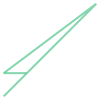

In [24]:
g1

In [ ]:
ex = topojson.extract(data)

In [ ]:
for ring in ex['rings']:
    ls = ring.boundary
    print(ls)

In [ ]:
isinstance(ring.boundary, geometry.MultiLineString)

In [ ]:
for l in ls:
    print(l)

In [ ]:
ex['rings'][0]

In [ ]:
[ unicode(x.strip()) 
 if x is not None 
 else '' 
 for x in row ]

#[x for x in a for a in b] # behavior like
[x for b in a for x in b] # solution
[x 
 for b in a 
 for x in b] # solution

>>> z = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
>>> [x for y in z if sum(y)>10 else y]
[5, 6, 7, 8, 9]
In regular for-loop:

>>> for y in z:
    if sum(y)>10:
        for x in y:
            print(x)
    else:
        print(y)
        
[val if val % 2 else -val
 for val in range(20) if val % 3]        

In [ ]:
[x 
 for val.boundary  
 in ex['rings']
 if isinstance(val.boundary, geometry.MultiLineString) 
]

In [ ]:
linearrings = []
for val in ex['rings']:
    if isinstance(val.boundary, geometry.MultiLineString):
        for x in val.boundary:
            linearrings.append(x)
    else:
        linearrings.append(val.boundary)

In [ ]:
L

In [ ]:
[for ring in ex['rings']

In [ ]:
[ring.boundary
 if not isinstance(ring.boundary, geometry.MultiLineString)
 else ls for ls in ring.boundary
 for ring in ex['rings'] 
]

In [ ]:
[ ls for ring if isinstance(ring.boundary, geometry.MultiLineString) else ring.boundary for ring in ex['rings'] ]

In [ ]:
fw, bw = shared_paths(g1, g2)

In [ ]:
g1.is_valid

In [ ]:
segments = list(fw)

In [ ]:
s_coords = [y for x in segments for y in list(x.coords)]
junctions = [i for i in s_coords if s_coords.count(i) is 1]

In [ ]:
s_coords

In [ ]:
junctions

In [ ]:
geometry.GeometryCollection([
    geometry.MultiLineString(join['lines']),
    geometry.MultiPolygon(join['rings']),
    geometry.MultiPoint(join['junctions'])    
])

In [ ]:
g1 = geometry.shape(data['abca1'])
g2 = geometry.shape(data['abca2'])

In [ ]:
extract['linearrings'] = [ring.boundary for ring in extract['rings']]
extract['mergerings'] = extract['linearrings'] + extract['rings']

In [ ]:
for ring in extract['rings']:
    print(ring)

In [ ]:
ring

In [ ]:
ring.boundary

In [ ]:
import itertools
line_combs = list(itertools.combinations(extract['rings'], 2))

In [ ]:
if line_combs[0][0] == geometry.Polygon:
    print('x')

In [ ]:
if isinstance(line_combs[0][0], geometry.Polygon):
    print('x')

In [ ]:
fw_bw = shared_paths(g1.boundary, g1.boundary)

In [ ]:
if not fw_bw.is_empty:
    print('im alive')

In [ ]:
?fw_bw[0]

In [ ]:
fw_bw[1]